In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interactive

# Ecology and Evolution (ICTP) Interactive Lecture Notes
## Notation
- $D_t f(x) \equiv \frac{d}{dt}f(x)$
- $\partial_t f(x) \equiv \frac{\partial}{\partial t}f(x)$
- $\quad\Rightarrow\quad\equiv$ "Implies"
## Non Linear Dynamics
***
### One Dimension
***
We define a Population function $$n: \mathbb{R}\mapsto\mathbb{R}$$

Assumptions:
- Time is Continuous
- No explicit Time dependence
- $n(t)$ is Continious
- No limited space
- No intraspecific variations (i.e. No Evolution)

The simplest case to study the growth of the population in time is to define a
Growth function (g) as a function of the Population function.

The system evolves in time through the Ordinary Diferential Equation (ODE):
$$D_tn(t) = g(n(t))n(t)$$
#### Constant Growth
By a constant growth rate $(r)$, we can easily solve the ODE and realize the
Population function grows in an exponential fashion:
$$g(n(t)) = r,\quad D_tn(t) = g(n(t))n(t)\quad\Rightarrow\quad n(t) = e^{rt}$$
#### Logarithmic Growth
We now proceed to define the Carrying Capacity $(k)$
$$g(n(t)) = r\left(1-\frac{n(t)}{k}\right),\quad D_tn(t) = g(n(t))n(t)\quad\Rightarrow\quad n(t) = e^{rt}$$


In [2]:
T = np.linspace(0, 50)
nmin, nmax = (1, 50)

def plotter(n, r, k):
  fig, ax = plt.subplots(1, 2, figsize=(10,5))
  fig.tight_layout(pad=5.0)

  F = lambda n, t, r: r*n
  expGrw = odeint(F, n, T, args=(r, ))
  expGrw = expGrw.T[0]
  dexpGrw = F(expGrw, T, r)

  F = lambda n, t, r, k: r*(1 - n/k)
  logGrw = odeint(F, n, T, args=(r, k))
  logGrw = logGrw.T[0]
  dlogGrw = F(logGrw, T, r, k)

  plt.subplot(121)
  plt.xlabel("$t$")
  plt.ylabel("$n(t)$")
  plt.plot(T, logGrw, label="$r(1 - n/k)$")
  plt.plot(T, [k]*len(T), label="$k$")
  plt.plot(T, expGrw, label="$r$")
  plt.ylim(0, 2*nmax)
  plt.legend()

  plt.subplot(122)
  plt.xlabel("$n(t)$")
  plt.ylabel("$D_tn(t)/n(t)$")
  plt.plot(logGrw, dlogGrw/logGrw, "->", label="r(1 - n/k)")
  plt.plot(expGrw, dexpGrw/expGrw, "->", label="r")
  plt.xlim(nmin, nmax)
  plt.legend()
  plt.grid()
  plt.show()

plotted = interactive(plotter, n=(nmin, nmax, 1),
                      r=(-1.0, 1.2, 0.01),
                      k=(0.0, 20.0, 0.01))
plotted

interactive(children=(IntSlider(value=25, description='n', max=50, min=1), FloatSlider(value=0.100000000000000…

$$D_tn(t) = rn(t)\left(1-\frac{n(t)}{k}\right) - \frac{n^2(t)}{1 + n^2(t)}$$

In [5]:
T = np.linspace(0, 50)
nmin, nmax = (1, 50)

def plotter(n, r, k):
  fig, ax = plt.subplots(2, 2, figsize=(10,10))
  fig.tight_layout(pad=5.0)

  F = lambda n, t, r, k: r*n*(1 - n/k)-n**2/(1+n**2)
  logGrw = odeint(F, n, T, args=(r, k))
  logGrw = logGrw.T[0]
  dlogGrw = F(logGrw, T, r, k)

  plt.subplot(221)
  plt.xlabel("$t$")
  plt.ylabel("$n(t)$")
  plt.plot(T, logGrw, label=r"$\rho*n*(1 - n/\kappa)-n^2/(1+n^2)$")
  plt.ylim(0, 2*nmax)
  plt.legend()

  plt.subplot(222)
  plt.xlabel("$n(t)$")
  plt.ylabel("$D_tn(t)/n(t)$")
  plt.plot(logGrw, dlogGrw, "->", label=r"$\rho*n*(1 - n/\kappa)-n^2/(1+n^2)$")
  plt.xlim(nmin, nmax)
  plt.ylim(-1, 1)
  plt.xlim(1, 5)
  plt.legend()
  plt.grid()

  plt.subplot(223)
  plt.xlabel("$n(t)$")
  plt.ylabel(r"$f(n^*, \rho, \kappa)$")
  F = lambda n, t, r, k: n/(1+n**2)
  plt.plot(logGrw, F(logGrw, T, r, k), label="$n/(1+n^2)$")
  F = lambda n, t, r, k: r*(1 - n/k)
  plt.plot(logGrw, F(logGrw, T, r, k), label="$r*(1 - n/k)$")
  plt.xlim(0)
  plt.legend()
  plt.grid()

  plt.subplot(224)
  plt.xlabel(r"$\kappa$")
  plt.ylabel(r"$\rho$")
  plt.plot([k], [r], 'bo')
  plt.xlim(0, 6.0*np.sqrt(3.0))
  plt.ylim(0, 3.0*np.sqrt(3.0)/4.0)
  plt.grid()
  plt.show()

plotted = interactive(plotter, n=(nmin, nmax, 1),
                      r=(0, 3.0*np.sqrt(3.0)/4.0, 0.01),
                      k=(0, 6.0*np.sqrt(3.0), 0.01))
plotted

interactive(children=(IntSlider(value=25, description='n', max=50, min=1), FloatSlider(value=0.64, description…

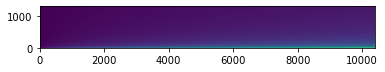

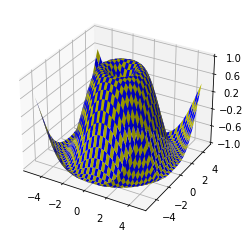

In [4]:
#%matplotlib widget
from matplotlib.ticker import LinearLocator

K, R = np.meshgrid(np.arange(0.01, 6.0*np.sqrt(3.0), 0.001),
                   np.arange(0.01, 3.0*np.sqrt(3.0)/4.0, 0.001))
N = np.sqrt(K/R + 1)
plt.imshow(N, origin="lower")
ax = plt.figure().add_subplot(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
xlen = len(X)
Y = np.arange(-5, 5, 0.25)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Create an empty array of strings with the same shape as the meshgrid, and
# populate it with two colors in a checkerboard pattern.
colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype=str)
for y in range(ylen):
  for x in range(xlen):
    colors[y, x] = colortuple[(x + y) % len(colortuple)]

# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(X, Y, Z, facecolors=colors, linewidth=0)

# Customize the z axis.
ax.set_zlim(-1, 1)
ax.zaxis.set_major_locator(LinearLocator(6))

plt.show()